In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
font_size = 20

In [83]:
# have to normalize salary by Rate per hour - because different people work more\less.
# define: 1 week is 40 hours, there are 52 weeks per year
# this standard removes the overtime confouder.

### Pre-processing

In [90]:
# Load dataset
raw_data = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# convert to numeric: Attrition, Gender, OverTime
raw_data.loc[:, 'Attrition'] = 1 * (raw_data['Attrition'] == 'Yes')
raw_data.loc[:, 'OverTime'] = 1 * (raw_data['OverTime'] == 'Yes')
raw_data.loc[:, 'Gender'] = 1 * (raw_data['Gender'] == 'Male')

## remove columns:

# not meaningful - EmployeeCount, EmployeeNumber, Over18, StandardHours
raw_data = raw_data.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'])

# EducationField - not relevant? TODO
# JobRole - Post treatment - remove from dataset
# choose only one income type: HourlyRate (chosen) ['MonthlyRate', 'DailyRate','MonthlyIncome'] (removed)
raw_data = raw_data.drop(columns=['JobRole','DailyRate', 'MonthlyRate','MonthlyIncome'])  # EducationField


# create binary features: Department, BusinessTravel, MaritalStatus
processed_data = pd.get_dummies(raw_data, columns=['Department','BusinessTravel','MaritalStatus'])

# remove only from processed
processed_data = processed_data.drop(columns=['EducationField'])


# assert there is no non-numeric data
for col in processed_data.columns:
    processed_data.loc[:, col] = pd.to_numeric(processed_data[col])
    
assert processed_data.isna().values.sum() == 0, "data should contain no nan's after cleaning"   

/tmp/ipykernel_111837/1863789269.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  raw_data.loc[:, 'Attrition'] = 1 * (raw_data['Attrition'] == 'Yes')
/tmp/ipykernel_111837/1863789269.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  raw_data.loc[:, 'OverTime'] = 1 * (raw_data['OverTime'] == 'Yes')
/tmp/ipykernel_111837/1863789269.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, 

In [91]:
processed_data

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,0,94,3,2,4,...,5,0,0,1,0,0,1,0,0,1
1,49,0,8,1,3,1,61,2,2,2,...,7,0,1,0,0,1,0,0,1,0
2,37,1,2,2,4,1,92,2,1,3,...,0,0,1,0,0,0,1,0,0,1
3,33,0,3,4,4,0,56,3,1,3,...,0,0,1,0,0,1,0,0,1,0
4,27,0,2,1,1,1,40,3,1,2,...,2,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,3,1,41,4,2,4,...,3,0,1,0,0,1,0,0,1,0
1466,39,0,6,1,4,1,42,2,3,1,...,7,0,1,0,0,0,1,0,1,0
1467,27,0,4,3,2,1,87,4,2,2,...,3,0,1,0,0,0,1,0,1,0
1468,49,0,2,3,4,1,63,2,2,2,...,8,0,0,1,0,1,0,0,1,0


### Data analysis

In [92]:
# Education-Salary plots
education_dict = {'1': 'Below College', '2': 'College', '3': 'Bachelor', '4': 'Master', '5': 'Doctor'}

Text(0.5, 1.0, 'Education level and Hourly Rate histogram')

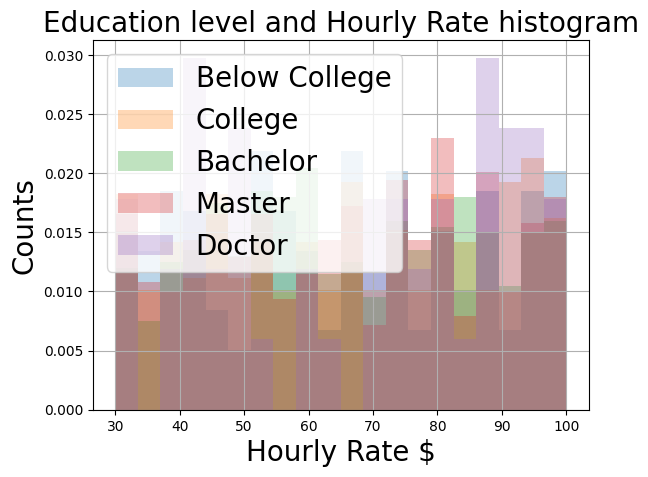

In [93]:
# plot age distribution given prediction
for i in range(5):
    data_subset = raw_data[raw_data.Education == (i+1)]
    data_subset.HourlyRate.hist(label=education_dict[str(i+1)], alpha=0.3, bins=20, density=True)

plt.xlabel('Hourly Rate $', fontsize=font_size)
plt.ylabel('Counts', fontsize=font_size)
plt.grid(True)
plt.legend(prop={'size': font_size})
plt.title('Education level and Hourly Rate histogram', fontsize=font_size)


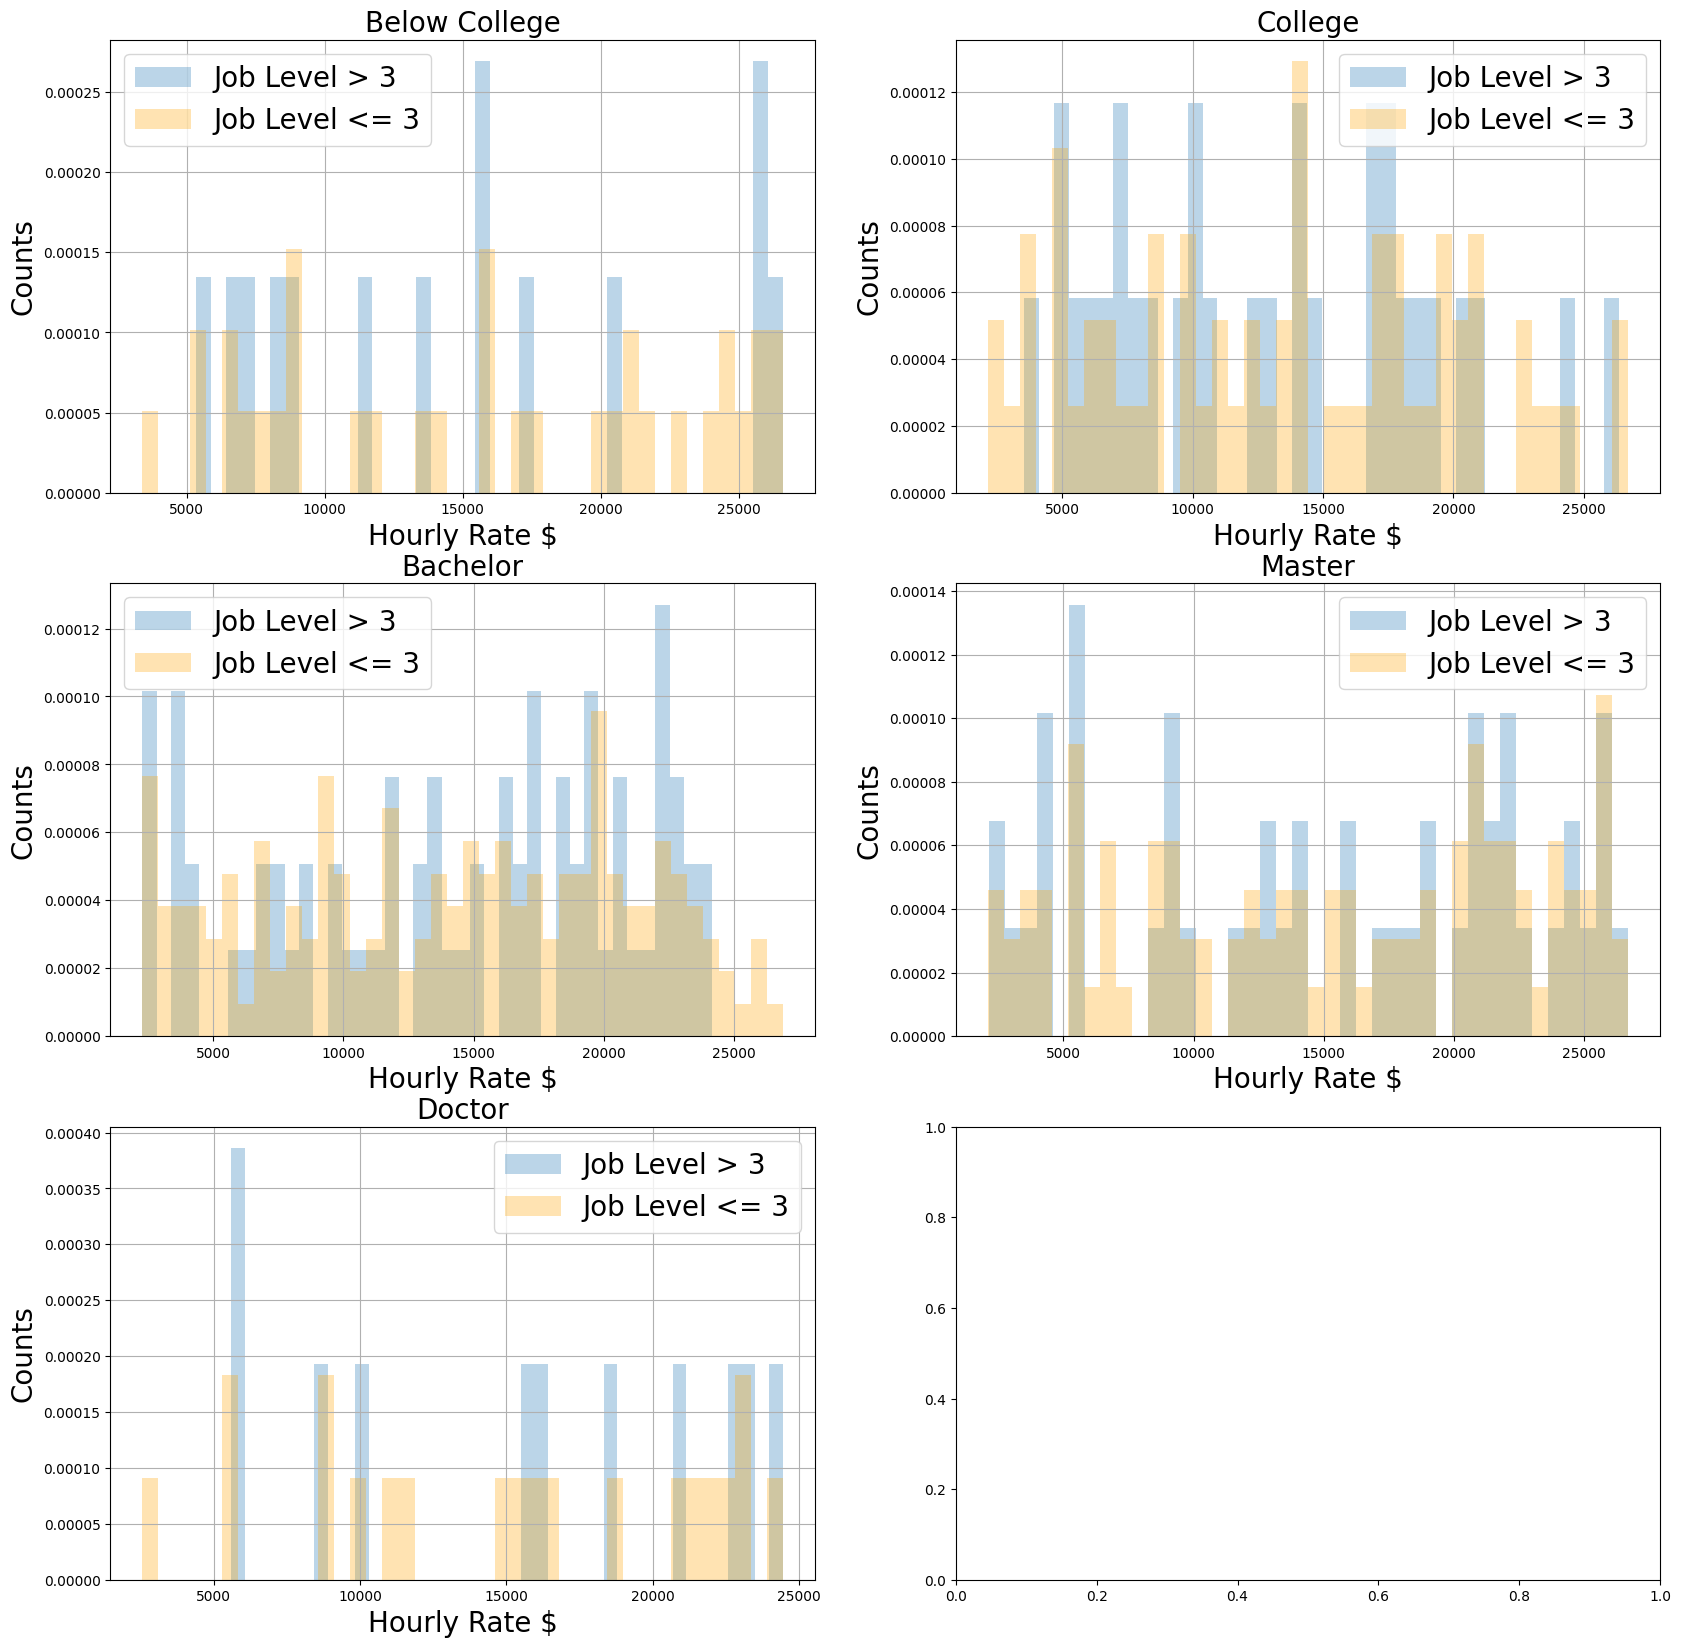

In [94]:
# Plot of Hourly rate histograms given education level and job level
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
cnt = 1
for row in ax:
    for col in row:
        if cnt > 5:
            break
            
        plt.sca(col)  # activate currect axis
        lev = 3
        data_subset = raw_data[(raw_data.Education == cnt) & (raw_data.JobLevel > lev)]
        data_subset.HourlyRate.hist(label='Job Level > 3', alpha=0.3, bins=40, density=True)
        
        data_subset = raw_data[(raw_data.Education == cnt) & (raw_data.JobLevel >= lev)]
        data_subset.HourlyRate.hist(label='Job Level <= 3', alpha=0.3, bins=40, density=True, color='orange')

        plt.xlabel('Hourly Rate $', fontsize=font_size)
        plt.ylabel('Counts', fontsize=font_size)
        plt.grid(True)
        plt.legend(prop={'size': font_size})
        plt.title(education_dict[str(cnt)], fontsize=font_size)
        
        cnt+=1


plt.show()

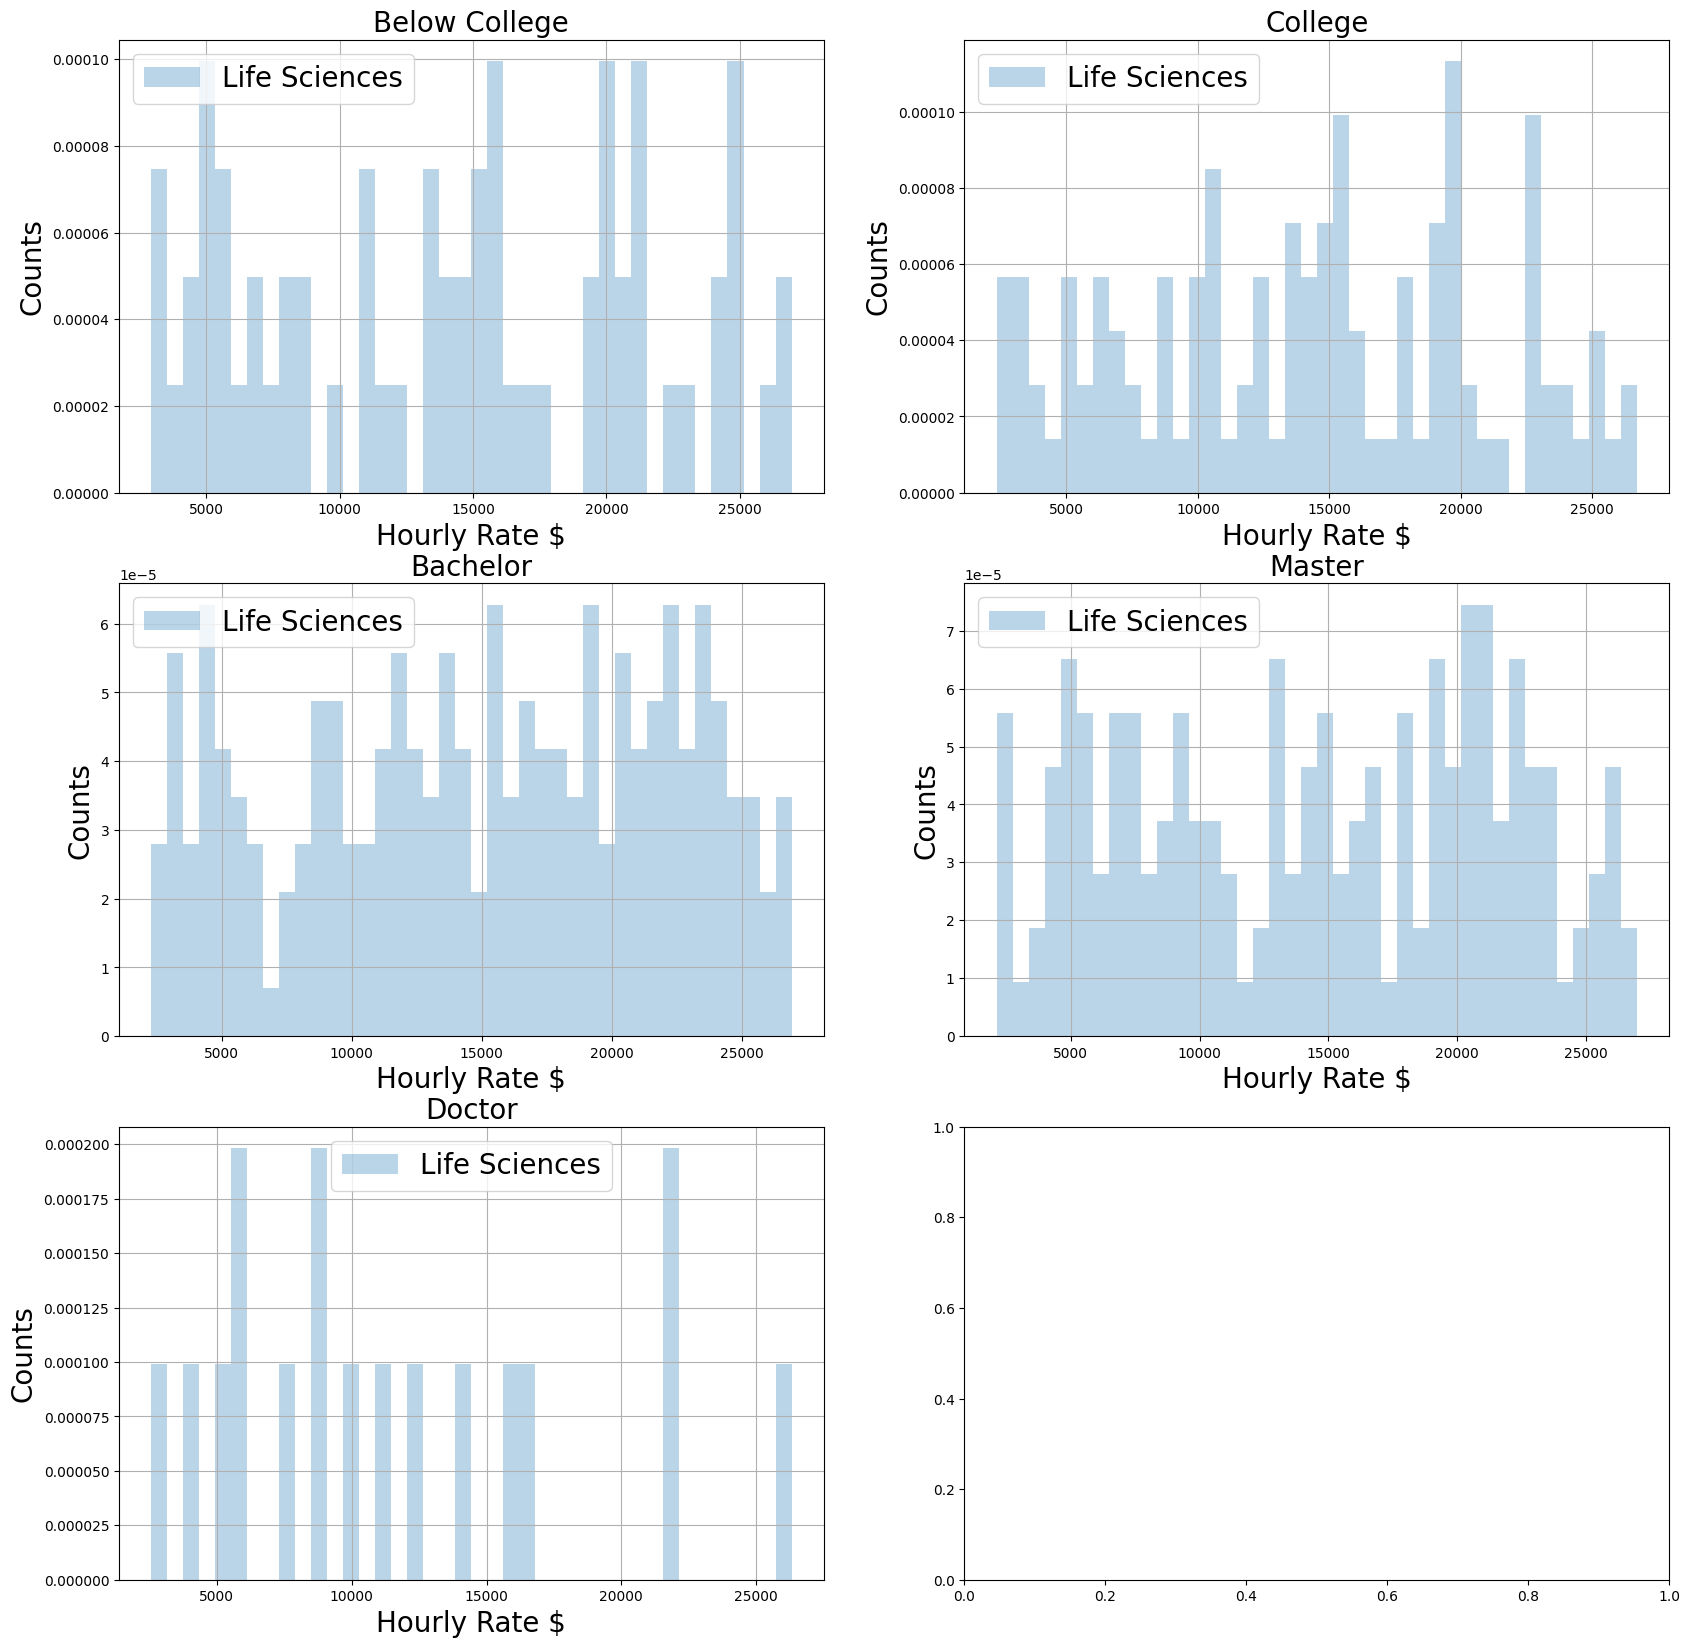

In [96]:
# Plot of Hourly rate histograms given education level - among Life Sciences degree
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
cnt = 1
for row in ax:
    for col in row:
        if cnt > 5:
            break
            
        plt.sca(col)  # activate currect axis
        data_subset = raw_data[(raw_data.Education == cnt) & (raw_data.EducationField == 'Life Sciences')]
        data_subset.HourlyRate.hist(label='Life Sciences', alpha=0.3, bins=40, density=True)
        

        plt.xlabel('Hourly Rate $', fontsize=font_size)
        plt.ylabel('Counts', fontsize=font_size)
        plt.grid(True)
        plt.legend(prop={'size': font_size})
        plt.title(education_dict[str(cnt)], fontsize=font_size)
        
        cnt+=1


plt.show()

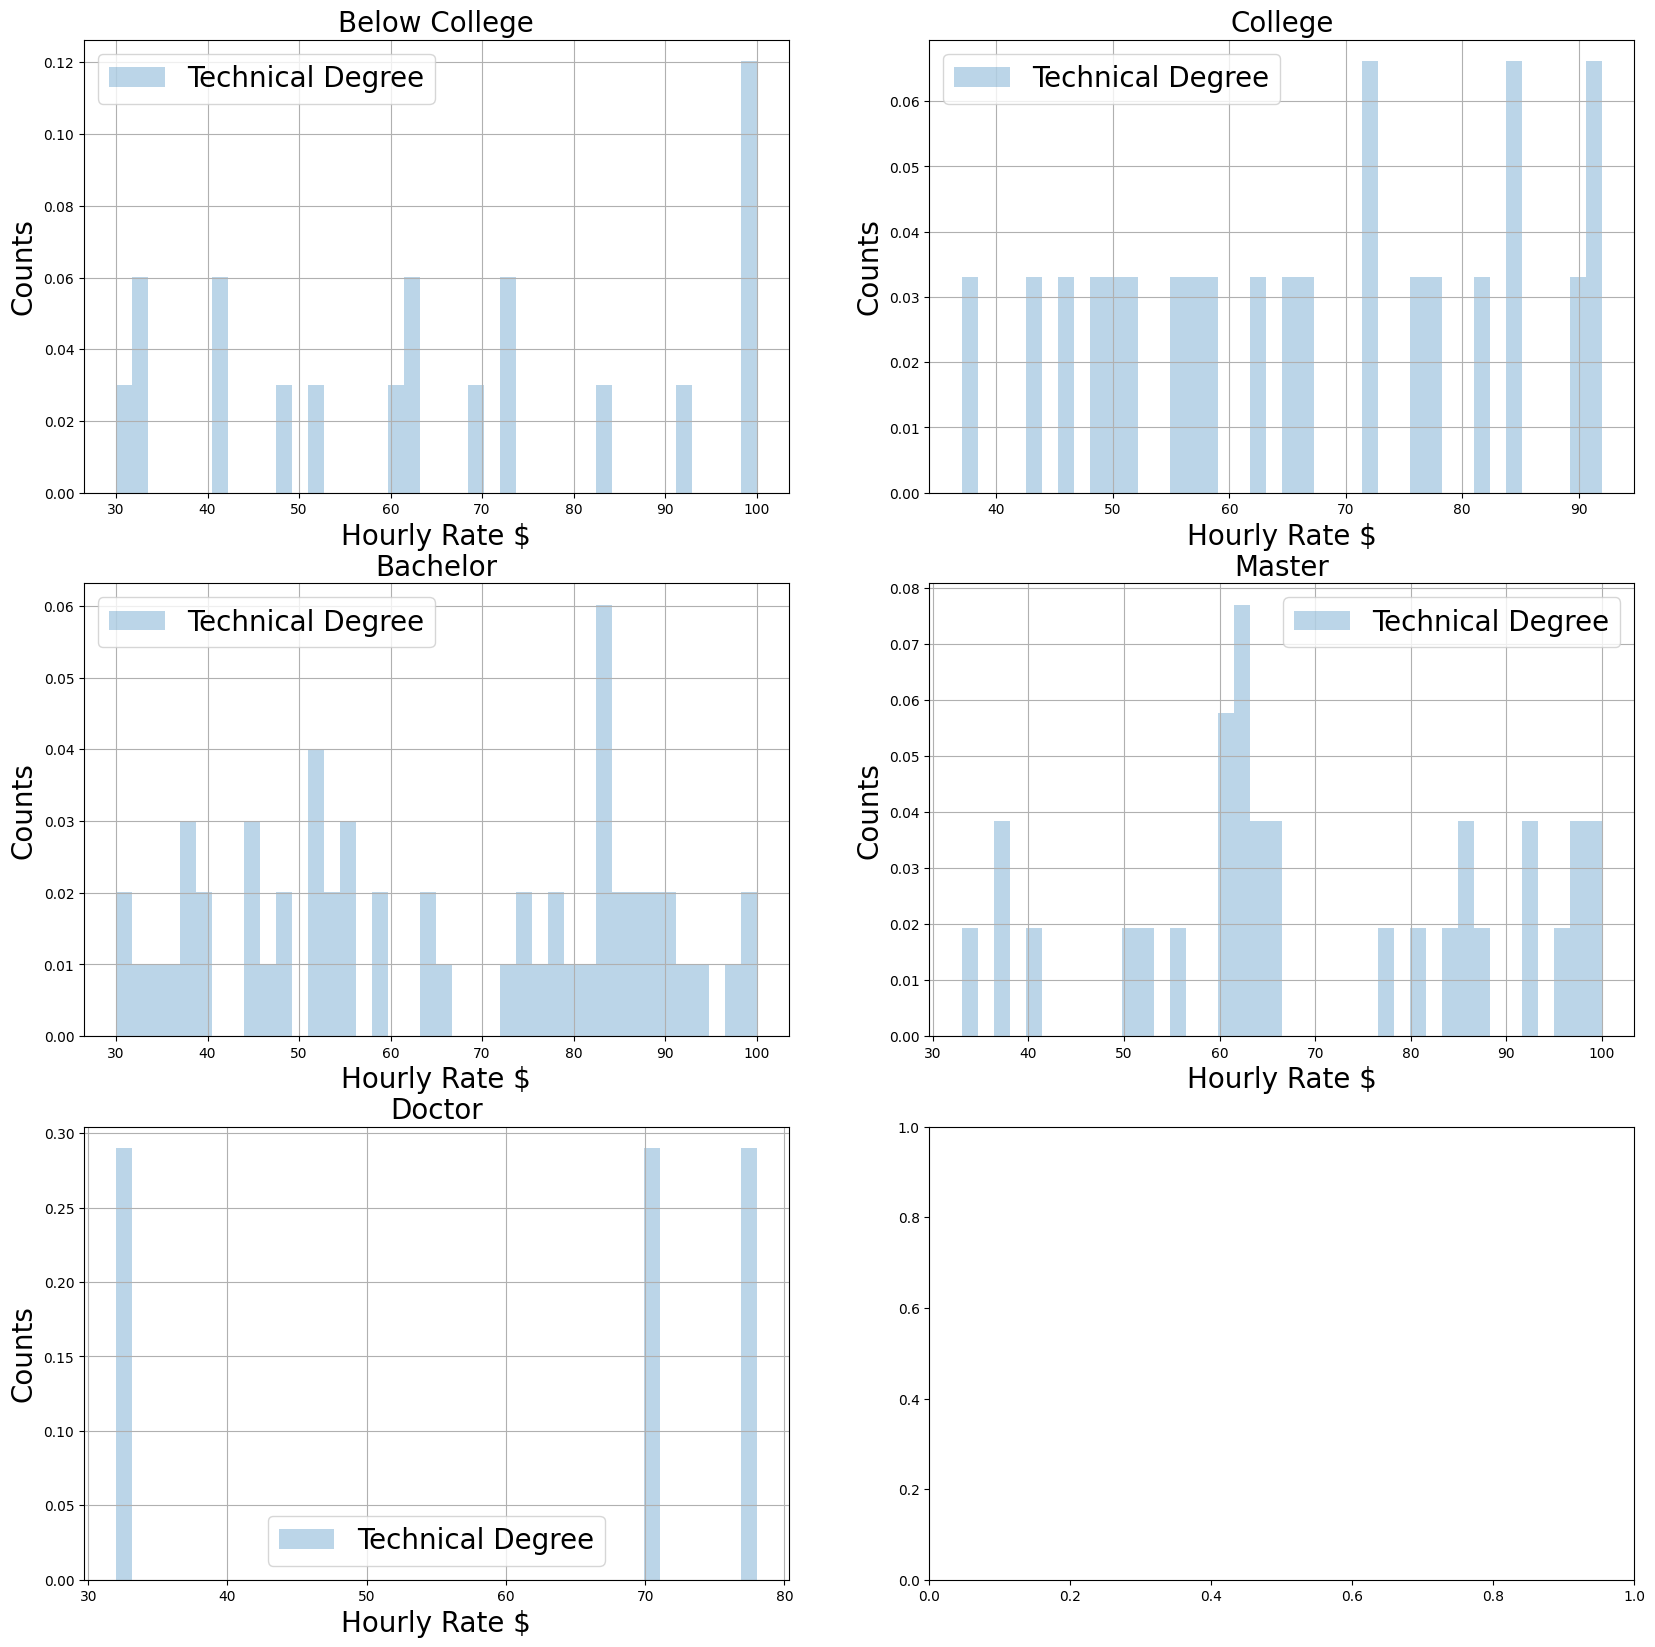

In [97]:
# Plot of Hourly rate histograms given education level - among Technical Degree
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
cnt = 1
for row in ax:
    for col in row:
        if cnt > 5:
            break
            
        plt.sca(col)  # activate currect axis
        data_subset = raw_data[(raw_data.Education == cnt) & (raw_data.EducationField == 'Technical Degree')]
        data_subset.HourlyRate.hist(label='Technical Degree', alpha=0.3, bins=40, density=True)
        

        plt.xlabel('Hourly Rate $', fontsize=font_size)
        plt.ylabel('Counts', fontsize=font_size)
        plt.grid(True)
        plt.legend(prop={'size': font_size})
        plt.title(education_dict[str(cnt)], fontsize=font_size)
        
        cnt+=1


plt.show()

In [ ]:
# First define a binary education by:
# Below college (excluding) == 0, above college == 1
